In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import optimize
%matplotlib inline

plt.rcParams['figure.figsize'] = (8*(1+np.sqrt(5))/2,8)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 17

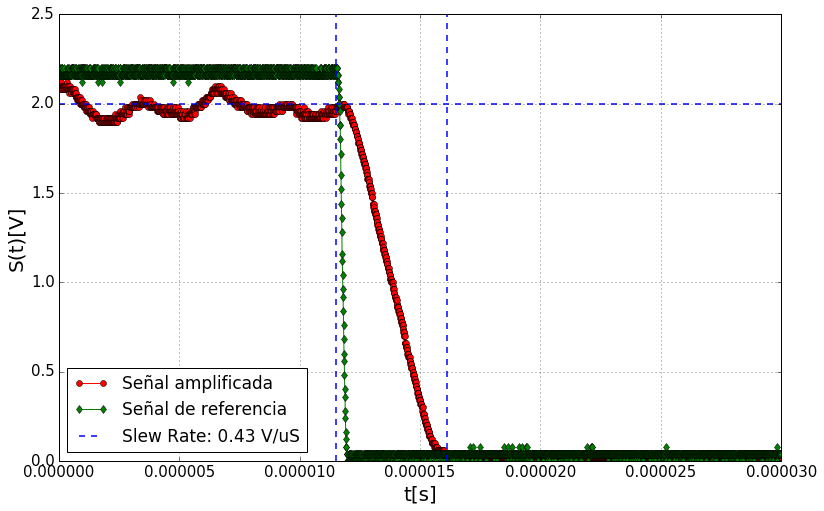

In [164]:
A = pd.read_csv("./freq_amp.csv", comment="#").drop("Unnamed: 3",axis=1).values

#Normalizo. Simplemente mantengo la escala y seteo el mismo valor mínimo
A[:,1] -= A[:,1].min()
#A[:,1] /= A[:,1].max()
A[:,2] -= A[:,2].min()
#A[:,2] /= A[:,2].max()

#Rescato los elementos a plotear
ind = (A[:,0] > -0.000015) & (A[:,0] < 0.000015)
A[:,0] -= A[ind,0].min()


plt.plot(A[ind,0],A[ind,1],"ro-",label="Señal amplificada")
plt.plot(A[ind,0],A[ind,2],"gd-",label="Señal de referencia")

plt.ylabel("S(t)[V]")
plt.xlabel("t[s]")

plt.axvline(x=1.15e-5,ls="--",lw=1.5,color="b")
plt.axvline(x=1.61e-5,ls="--",lw=1.5,color="b")

plt.axhline(y=2.0,ls="--",lw=1.5,color="b", label="Slew Rate: {:.2f} V/uS".format(2/(16.1 - 11.5)))

plt.legend(loc=0);
plt.grid()

plt.savefig("transicion_amp.png",bbox_inches="tight")

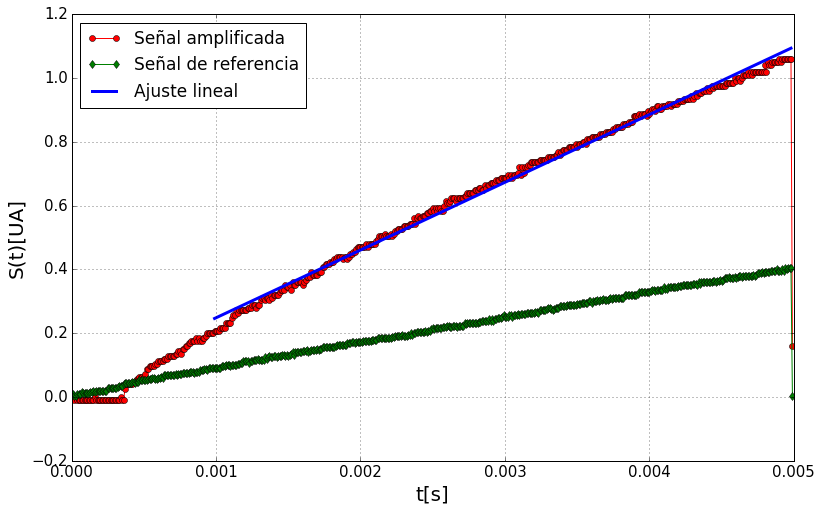

In [39]:
A = pd.read_csv("./_lin_amp.csv", comment="#").drop("Unnamed: 3",axis=1).values

#Normalizo. Simplemente mantengo la escala y seteo el mismo valor mínimo
#A[:,1] -= A[:,1].min()
#A[:,1] /= A[:,1].max()
#A[:,2] -= A[:,2].min()
#A[:,2] /= A[:,2].max()

ind = (A[:,0] > 0) & (A[:,0] < 0.005)
#A[:,0] -= A[ind,0].min()


plt.plot(A[ind,0],A[ind,1],"ro-",label="Señal amplificada")
plt.plot(A[ind,0],A[ind,2],"gd-",label="Señal de referencia")

f = lambda x, a, b: a + b * x

fInd = A[ind,1] > 0.2

p, cov = sp.optimize.curve_fit(f, A[ind,0][fInd], A[ind,1][fInd],p0=[1,1])
t = np.linspace(A[ind,0][fInd].min(),A[ind,0][fInd].max(),1000)

plt.plot(t,f(t,*p),"b-", linewidth=3, label="Ajuste lineal")

plt.legend(loc=0)
plt.grid()
plt.xlabel("t[s]")
plt.ylabel("S(t)[UA]")

plt.savefig("lin_amp.png",bbox_inches="tight")

In [12]:
A = pd.read_csv("./_lin_amp.csv", comment="#").values
#Normalizo. Simplemente mantengo la escala y seteo el mismo valor mínimo
A[:,1] -= A[:,1].min()
#A[:,1] /= A[:,1].max()
A[:,2] -= A[:,2].min()
#A[:,2] /= A[:,2].max()

ind = (A[:,0] > 0) & (A[:,0] < 0.005)
A[:,0] -= A[ind,0].min()


plt.plot(A[ind,0],A[ind,1]/A[ind,1].max(),"ro-",label="Señal amplificada")
plt.plot(A[ind,0],A[ind,2],"gd-",label="Señal de referencia")

f = lambda x, a, b: a + b * x

p, cov = sp.optimize.curve_fit(f, A[ind,0], A[ind,1],p0=[1,1])
t = np.linspace(A[ind,0].min(),A[ind,0].max(),1000)

plt.plot(t,f(t,*p),"b-", linewidth=3, label="Ajuste lineal")

plt.legend(loc=0)
plt.grid()

plt.savefig("led_rojo_rampa_offset.png",bbox_inches="tight")

[]


IndexError: index 1 is out of bounds for axis 1 with size 1

[ -0.03201111  26.80969485] [[  1.18153395e-07  -3.26594100e-05]
 [ -3.26594100e-05   9.75490141e-03]]


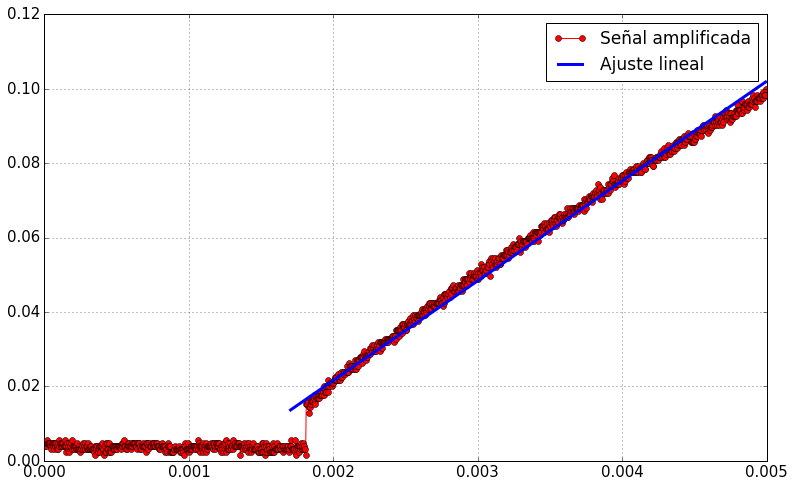

In [8]:
A = pd.read_csv("./lin_amp_0.csv", comment="#").drop("Unnamed: 3",axis=1).values

#Normalizo. Simplemente mantengo la escala y seteo el mismo valor mínimo
A[:,1] -= A[:,1].min()
#A[:,1] /= A[:,1].max()
A[:,2] -= A[:,2].min()
#A[:,2] /= A[:,2].max()


ind = (A[:,0] > -0.005) & (A[:,0] < 0)
t = A[ind,0]
V = A[ind,1]
t -= A[ind,0].min()


indFit = (t > 0.0017)


plt.plot(t, V,"ro-",label="Señal amplificada")
#plt.plot(A[ind,0],A[ind,2],"gd-",label="Señal de referencia")

f = lambda x, a, b: a + b * x

p, cov = sp.optimize.curve_fit(f, t[indFit], V[indFit], p0=[1,1])
t = np.linspace(t[indFit].min(), t[indFit].max(),1000)

print(p, cov)

plt.plot(t, f(t,*p), "b-", linewidth=3, label="Ajuste lineal")

plt.legend(loc=0)

plt.grid()

plt.savefig("led_rojo_rampa.png",bbox_inches="tight")